# Model Testing Framework: Demonstration Code #

In [1]:
import json
import time
import pandas as pd
import numpy as np
import sys
import os


#//**** Custom Python Libraries to keep things organized
import model_testing

from importlib import reload #//*** Reload library reloads an external python File.

from IPython.display import clear_output

#//*** Use the whole window in the IPYNB editor
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

f = open("./ignore_folder/alpha_vantage_api.json", "r")

av_apikey = json.loads(f.read())['apikey']
f.close()


In [2]:
#//*** Initialize the alpha vantage class object with an API key
av = model_testing.alpha_vantage(api_key=av_apikey)

#//*** Pick some ticker symbols to download
symbols = ['AAPL','AMD','NVDA','GOOGL']

#//*** Download Daily Historical Stock Closing Prices
av.get_stocks(action='daily',symbols=symbols)



Downloading: AAPL at daily intervals
Building URL: AAPL
Downloading
Processing....
Building Dataframe
Writing dataframe to File: AAPL_daily.csv.zip
Waiting 20 Seconds
Downloading: AMD at daily intervals
Building URL: AMD
Downloading
Processing....
Building Dataframe
Writing dataframe to File: AMD_daily.csv.zip
Waiting 20 Seconds
Downloading: NVDA at daily intervals
Building URL: NVDA
Downloading
Processing....
Building Dataframe
Writing dataframe to File: NVDA_daily.csv.zip
Waiting 20 Seconds
Downloading: GOOGL at daily intervals
Building URL: GOOGL
Downloading
Processing....
Building Dataframe
Writing dataframe to File: GOOGL_daily.csv.zip
Waiting 20 Seconds


In [42]:
reload(model_testing)
#//*** Initialize model testing object
mt = model_testing.model_testing()

#//*** Build a data frame of AAPL daily closing prices using the last 48 months of data
mt.build_df("AAPL",months=48)

mt.df


,date,symbol,open,high,low,close,volume
4637,2018-04-09,AAPL,169.88,173.09,169.850,170.05,2901.7718
4638,2018-04-10,AAPL,173.00,174.00,171.530,173.25,2861.4241
4639,2018-04-11,AAPL,172.23,173.92,171.700,172.44,2243.1640
4640,2018-04-12,AAPL,173.41,175.00,173.040,174.14,2288.9285
4641,2018-04-13,AAPL,174.78,175.84,173.850,174.73,2512.4255
...,...,...,...,...,...,...,...
5642,2022-04-04,AAPL,174.57,178.49,174.440,178.44,7654.5983
5643,2022-04-05,AAPL,177.50,178.30,174.415,175.06,7090.2999
5644,2022-04-06,AAPL,172.36,173.63,170.130,171.83,8905.8782
5645,2022-04-07,AAPL,171.16,173.36,169.850,172.14,7759.4650


In [43]:
#//*** Define the technical indicators to build
tc = [
    "ema_close_5",  #//*** 5 Day Exponential Moving Average, Close Values 
    "dema_close_5", #//*** 5 Day Double Exponential Moving Average, Close Values 
    "sma_close_5",  #//*** 5 Days Simple Moving Average, Close Values 
    "sma_close_30", #//*** 30 Day, Simple Moving Average Close Values
]


#//*** Build Technical indicators
mt.build_technicals(tc)

mt.df


,date,symbol,open,high,low,close,volume,ema_close_5,dema_close_5,sma_close_5,sma_close_30
4666,2018-05-18,AAPL,187.19,187.81,186.130,186.31,1829.7728,186.91,187.30,187.214,176.610667
4667,2018-05-21,AAPL,188.00,189.27,186.910,187.63,1840.0787,187.15,187.57,187.110,177.196667
4668,2018-05-22,AAPL,188.38,188.88,186.780,187.16,1524.0704,187.15,187.43,187.254,177.660333
4669,2018-05-23,AAPL,186.35,188.50,185.760,188.36,2005.8415,187.56,188.02,187.290,178.191000
4670,2018-05-24,AAPL,188.77,188.84,186.210,188.15,2323.3975,187.75,188.18,187.522,178.658000
...,...,...,...,...,...,...,...,...,...,...,...
5642,2022-04-04,AAPL,174.57,178.49,174.440,178.44,7654.5983,176.13,177.64,176.818,165.733000
5643,2022-04-05,AAPL,177.50,178.30,174.415,175.06,7090.2999,175.77,176.54,176.038,166.091000
5644,2022-04-06,AAPL,172.36,173.63,170.130,171.83,8905.8782,174.46,174.10,174.850,166.483000
5645,2022-04-07,AAPL,171.16,173.36,169.850,172.14,7759.4650,173.68,172.92,174.356,166.796333


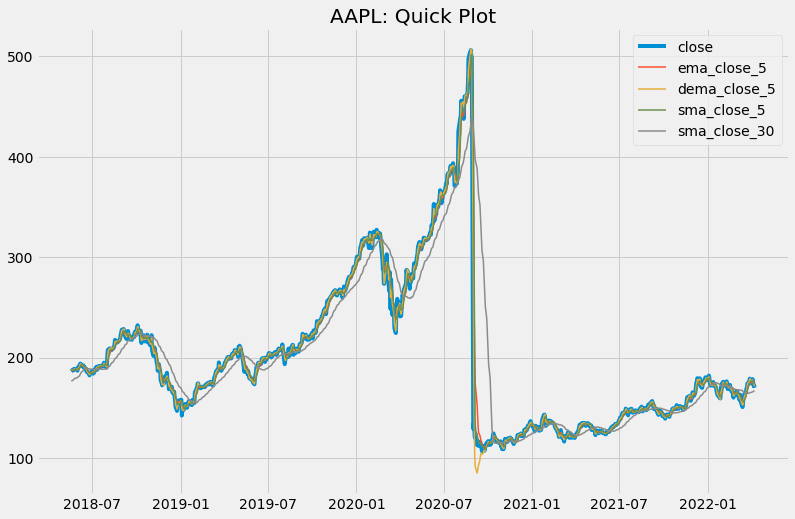

In [44]:
mt.plot_cols()

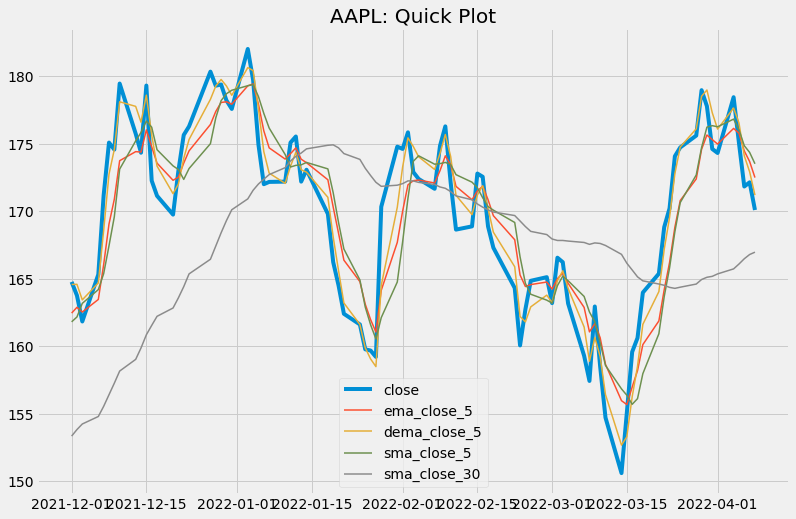

In [45]:
mt.plot_cols(start_index=-90)

30 / 30 [ 183.47 ] -  170.09   9 s - remaining:  9 s
DF
            date symbol    open    high      low   close     volume  \
4667  2018-05-21   AAPL  188.00  189.27  186.910  187.63  1840.0787   
4668  2018-05-22   AAPL  188.38  188.88  186.780  187.16  1524.0704   
4669  2018-05-23   AAPL  186.35  188.50  185.760  188.36  2005.8415   
4670  2018-05-24   AAPL  188.77  188.84  186.210  188.15  2323.3975   
4671  2018-05-25   AAPL  188.23  189.65  187.650  188.58  1746.0963   
...          ...    ...     ...     ...      ...     ...        ...   
5641  2022-04-01   AAPL  174.03  174.88  171.940  174.31  7875.1328   
5642  2022-04-04   AAPL  174.57  178.49  174.440  178.44  7654.5983   
5643  2022-04-05   AAPL  177.50  178.30  174.415  175.06  7090.2999   
5644  2022-04-06   AAPL  172.36  173.63  170.130  171.83  8905.8782   
5645  2022-04-07   AAPL  171.16  173.36  169.850  172.14  7759.4650   

      ema_close_5  dema_close_5  sma_close_5  sma_close_30  
4667       187.15        187.5

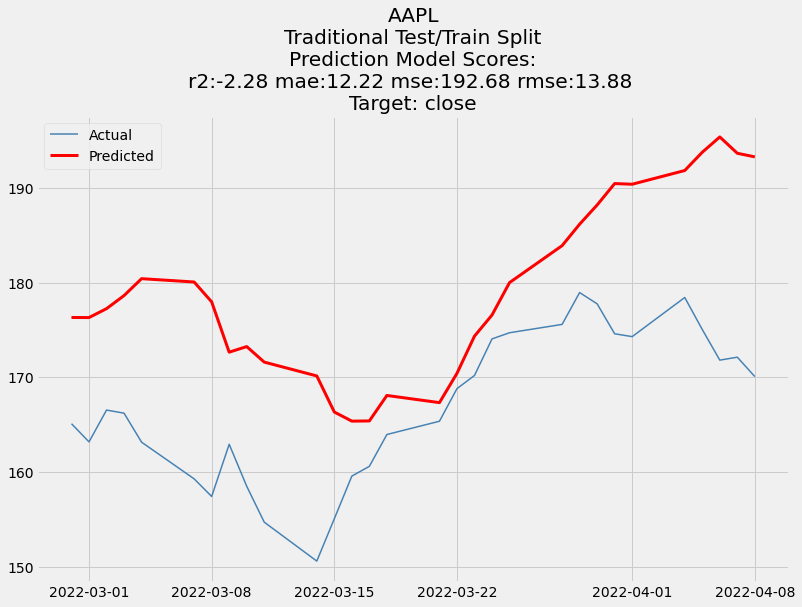

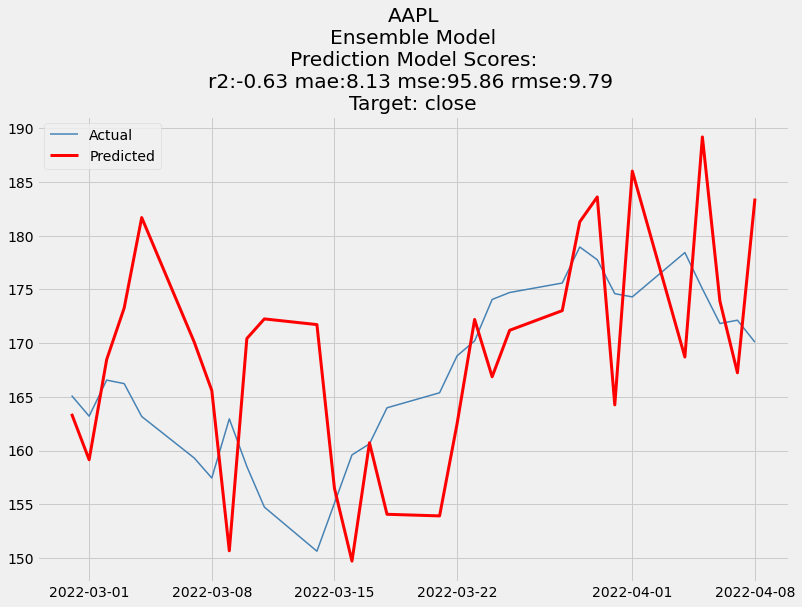

In [48]:

options={
       'days_to_model' : 30,
       "pa" : 1, 
       "num_layers":256,
       "activation" : "relu",
       "lb":10,
       "epochs" : 40,
       "patience" : 5,
       "cols" : ['close','open','high','low','volume'] + tc,
       "target" : "close",
   }

mt.build_model(model_type="traditional", options=options)
mt.build_model(model_type="ensemble", options=options)

mt.plot_predictions(priority=['predict'])


In [54]:
#//*** Build Simulated Buy/Sell/Hold Actions to simulate Profit and Loss
mt.calc_results("build_actions",model='traditional',action_type ='pl',threshold=.03)
mt.calc_results("build_actions",model='ensemble',action_type ='pl',threshold=.03)

#//*** Calculate Profit and Loss based on trading Actions
traditional_pl = mt.calc_results("pl",model='traditional',target="close",verbose=False)
ensemble_pl = mt.calc_results("pl",model='ensemble',target="close",verbose=False)


print("Traditional Model Profit:", traditional_pl)
print("Ensemble Model Profit:   ", ensemble_pl)

Traditional Model Profit: 0
Ensemble Model Profit:    -3.82


5617    0
5618   -1
5619    1
5620    1
5621    1
5622    1
5623    1
5624   -1
5625    1
5626    1
5627    1
5628    1
5629   -1
5630    0
5631   -1
5632   -1
5633    0
5634    1
5635    0
5636    0
5637    0
5638    1
5639    0
5640   -1
5641    1
5642   -1
5643    1
5644    0
5645   -1
5646    1
Name: actions, dtype: int64

## Run the code again, and compare results ##

30 / 30 [ 188.26 ] -  170.09   7 s - remaining:  7 s
DF
            date symbol    open    high      low   close     volume  \
4667  2018-05-21   AAPL  188.00  189.27  186.910  187.63  1840.0787   
4668  2018-05-22   AAPL  188.38  188.88  186.780  187.16  1524.0704   
4669  2018-05-23   AAPL  186.35  188.50  185.760  188.36  2005.8415   
4670  2018-05-24   AAPL  188.77  188.84  186.210  188.15  2323.3975   
4671  2018-05-25   AAPL  188.23  189.65  187.650  188.58  1746.0963   
...          ...    ...     ...     ...      ...     ...        ...   
5641  2022-04-01   AAPL  174.03  174.88  171.940  174.31  7875.1328   
5642  2022-04-04   AAPL  174.57  178.49  174.440  178.44  7654.5983   
5643  2022-04-05   AAPL  177.50  178.30  174.415  175.06  7090.2999   
5644  2022-04-06   AAPL  172.36  173.63  170.130  171.83  8905.8782   
5645  2022-04-07   AAPL  171.16  173.36  169.850  172.14  7759.4650   

      ema_close_5  dema_close_5  sma_close_5  sma_close_30  
4667       187.15        187.5

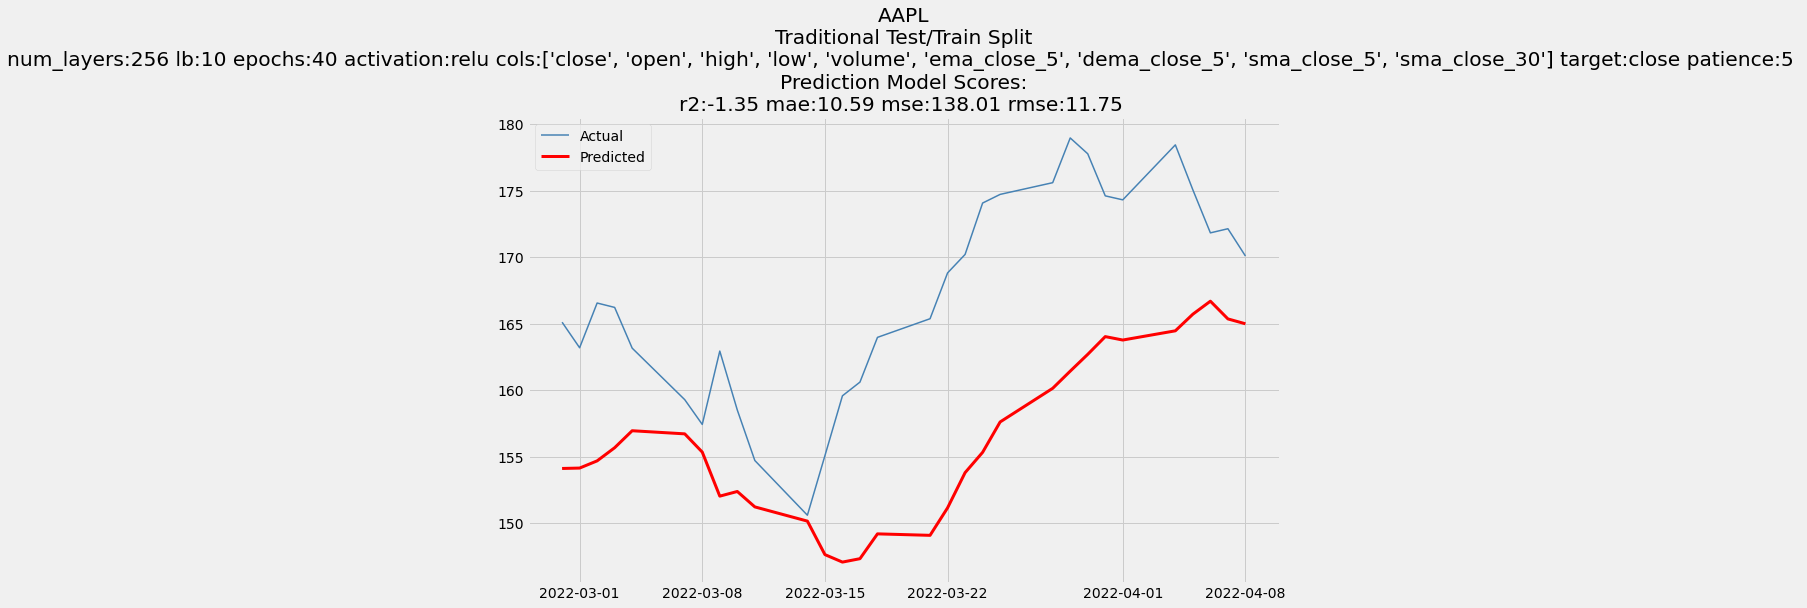

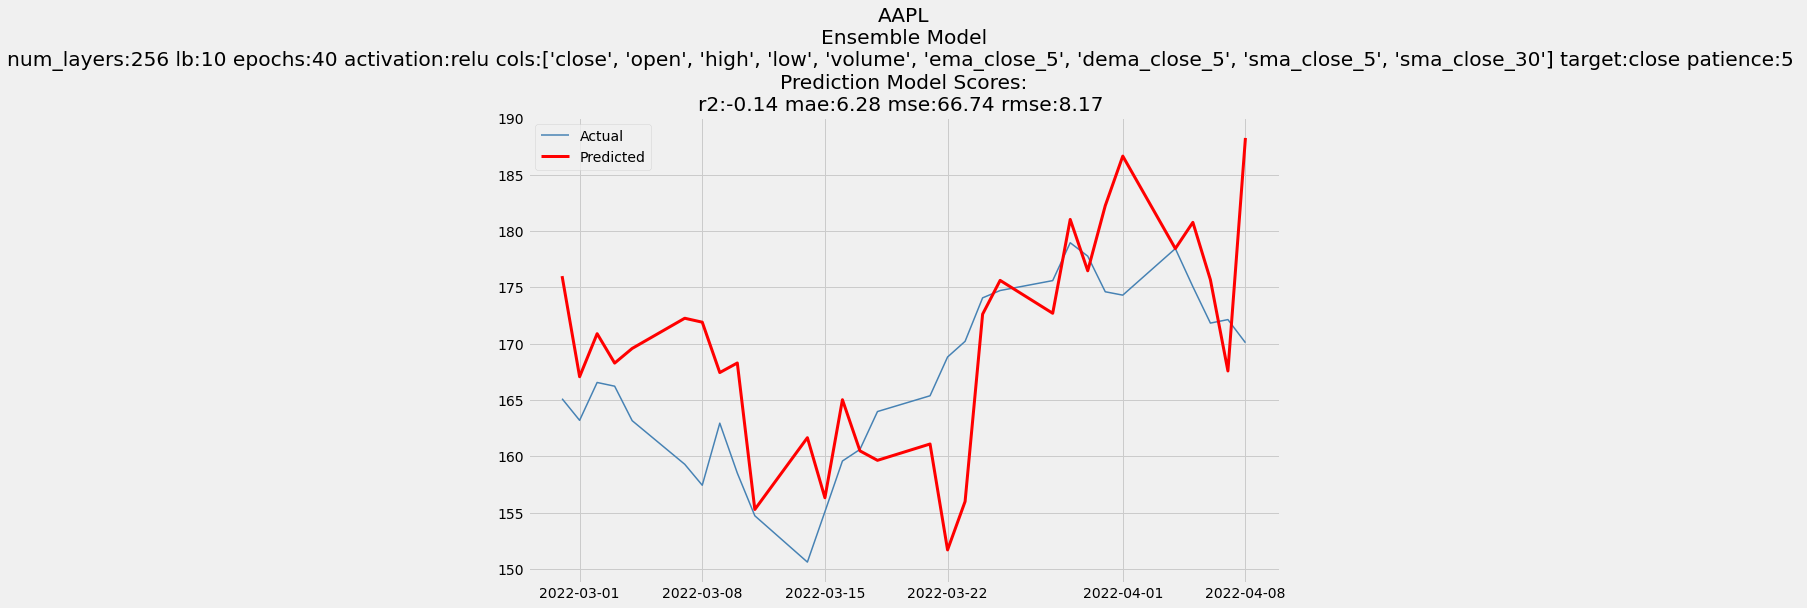

In [8]:

mt.build_model(model_type="traditional", options=options)
mt.build_model(model_type="ensemble", options=options)

mt.plot_predictions(priority=['predict'])


In [9]:
#//*** Build Simulated Buy/Sell/Hold Actions to simulate Profit and Loss
mt.calc_results("build_actions",model='traditional',action_type ='pl',threshold=.03)
mt.calc_results("build_actions",model='ensemble',action_type ='pl',threshold=.03)

#//*** Calculate Profit and Loss based on trading Actions
traditional_pl = mt.calc_results("pl",model='traditional',target="close",verbose=False)
ensemble_pl = mt.calc_results("pl",model='ensemble',target="close",verbose=False)

print("Traditional Model Profit:", traditional_pl)
print("Ensemble Model Profit:   ", ensemble_pl)


Traditional Model Profit: 0.0
Ensemble Model Profit:    -3.85


## Multiple Model Runs ##

In [57]:
reload(model_testing)

model_runs = []

#//*** Run the Model multiple times and save each version
for x in range(11):

    #//*** Initialize model testing object
    mt = model_testing.model_testing()

    #//*** Build a data frame of AAPL daily closing prices using the last 48 months of data
    mt.build_df("AAPL",months=48)

    #//*** Build Technical indicators
    mt.build_technicals(tc)
    
    #//*** Generate Predictions
    mt.build_model(model_type="traditional", options=options)
    mt.build_model(model_type="ensemble", options=options)
    
    #//*** Add the MTF to the model_runs list for later processing
    model_runs.append(mt)

#//*** Store Model runs to file
with open('./models/multi_model_comparison.pkl','wb') as file:
    pickle.dump(model_runs,file)

30 / 30 [ 179.61 ] -  170.09   8 s - remaining:  8 s
DF
            date symbol    open    high      low   close     volume  \
4667  2018-05-21   AAPL  188.00  189.27  186.910  187.63  1840.0787   
4668  2018-05-22   AAPL  188.38  188.88  186.780  187.16  1524.0704   
4669  2018-05-23   AAPL  186.35  188.50  185.760  188.36  2005.8415   
4670  2018-05-24   AAPL  188.77  188.84  186.210  188.15  2323.3975   
4671  2018-05-25   AAPL  188.23  189.65  187.650  188.58  1746.0963   
...          ...    ...     ...     ...      ...     ...        ...   
5641  2022-04-01   AAPL  174.03  174.88  171.940  174.31  7875.1328   
5642  2022-04-04   AAPL  174.57  178.49  174.440  178.44  7654.5983   
5643  2022-04-05   AAPL  177.50  178.30  174.415  175.06  7090.2999   
5644  2022-04-06   AAPL  172.36  173.63  170.130  171.83  8905.8782   
5645  2022-04-07   AAPL  171.16  173.36  169.850  172.14  7759.4650   

      ema_close_5  dema_close_5  sma_close_5  sma_close_30  
4667       187.15        187.5

In [ ]:
    #mean_mt.calc_results("build_actions",model='ensemble',action_type ='pl',threshold=.03)
    #mean_mt.calc_results("build_actions",model='traditional',action_type ='pl',threshold=.03)
    #traditional_pl_list.append(mean_mt.calc_results("pl",model='traditional',target="close",verbose=False))
    #ensemble_pl_list.append(mean_mt.calc_results("pl",model='traditional',target="close",verbose=False))


In [58]:
import pickle 
#//*** Load Model Runs as needed
with open('./models/multi_model_comparison.pkl','rb') as file:
    model_runs = pickle.load(file)


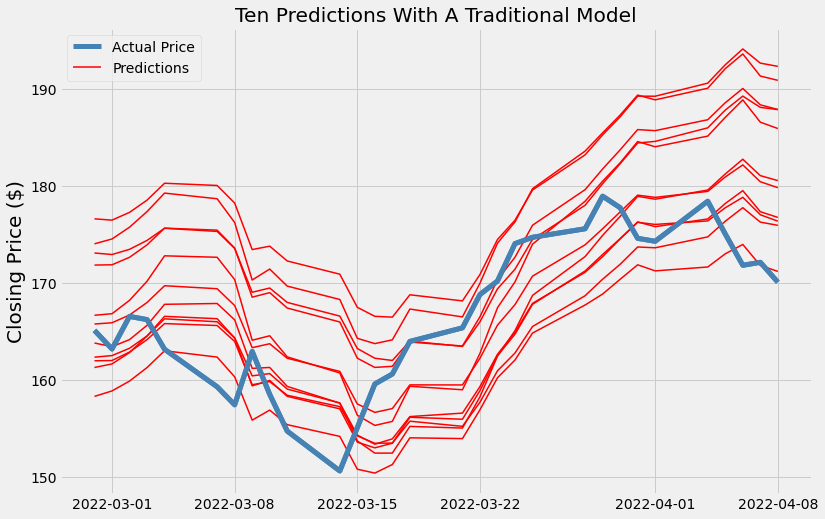

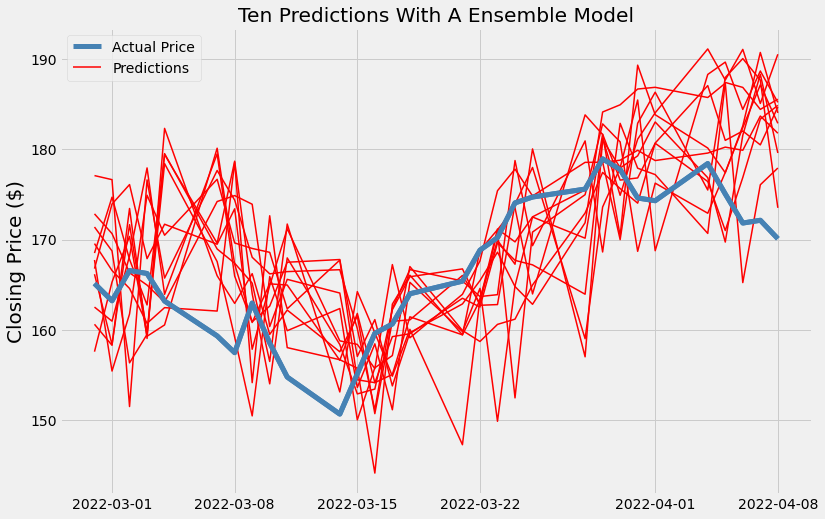

In [73]:
#//*** Plot Each Model Type
for model_type in ['traditional','ensemble']:
    
    #//*** Initialize the figure
    plt.figure(figsize=(12, 8))
    plt.style.use('fivethirtyeight')
    
    plot_x = model_runs[0].results[model_type]['predict_date']
    plot_y = model_runs[0].results[model_type]['actual']

    plt.plot(plot_x,plot_y,linewidth=5, color='steelblue', label="Actual Price")
    for mt in model_runs:

        plot_x = mt.results[model_type]['predict_date']
        plot_y = mt.results[model_type]['predict']

        

        if mt == model_runs[0]:
            plt.plot(plot_x,plot_y,color='red',label='Predictions',linewidth=1.5)
        else:
            plt.plot(plot_x,plot_y,color='red',linewidth=1.5)

    plot_x = model_runs[0].results[model_type]['predict_date']
    plot_y = model_runs[0].results[model_type]['actual']
    plt.plot(plot_x,plot_y,color='steelblue',linewidth=5)

    plt.ylabel("Closing Price ($)",fontsize=20)
    plt.title(f"Ten Predictions with a {model_type} Model".title())
    plt.legend()
    plt.show()

## Build Dataframes to hold the predictions for Traditional and Ensemble models ##

In [74]:

#//*** Initialize Traditional Modeling Predictions
tdf = pd.DataFrame()

#//*** Initialize Ensemble Modeling Predictions
edf = pd.DataFrame()

#//*** Loop through model runs and add the individual predictions to DataFrame
for mt in model_runs:
    tdf = pd.concat([tdf,pd.Series(mt.results['traditional']['predict'])],axis=1)
    edf = pd.concat([edf,pd.Series(mt.results['ensemble']['predict'])],axis=1)


## Plot the Mean of the Predictions for each Model ##

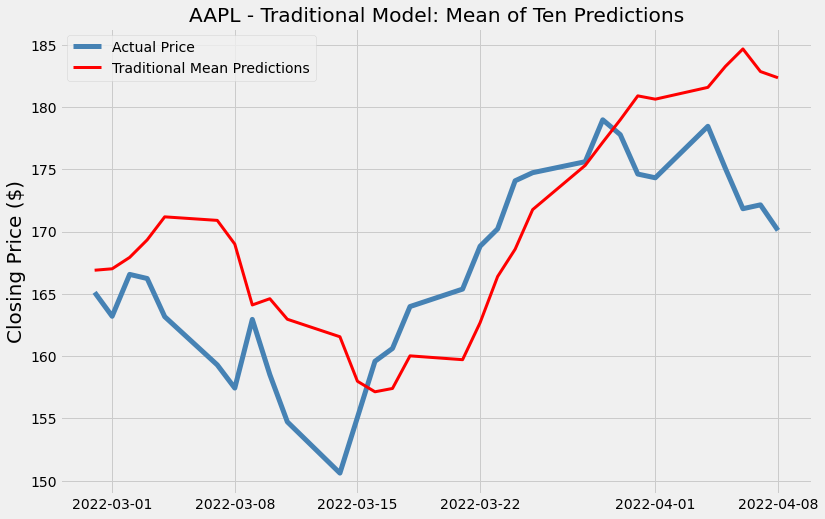

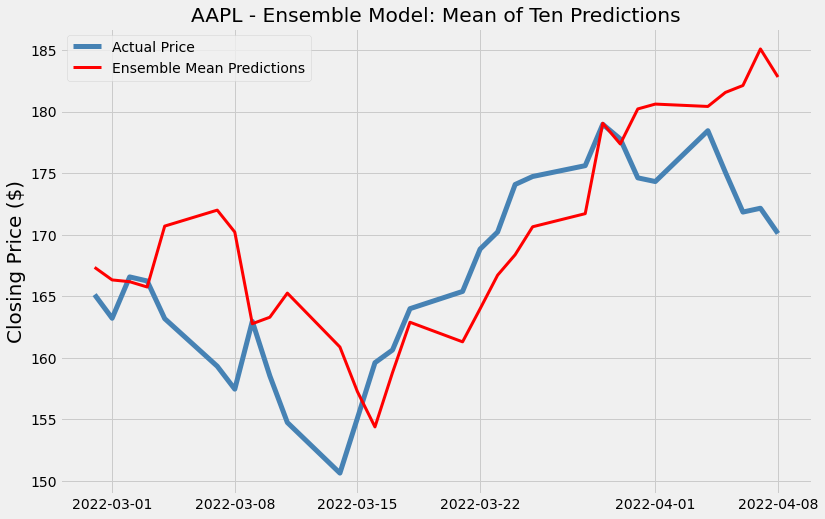

In [79]:
#//*** Plot Traditional Model
plt.figure(figsize=(12, 8))

#//*** PLot the Actual Price and Date
plot_x = model_runs[0].results['traditional']['predict_date']
plot_y = model_runs[0].results['traditional']['actual']
plt.plot(plot_x,plot_y,color='steelblue',linewidth=5, label="Actual Price")

#//*** Plot Mean Predictions 
plot_y = tdf.transpose().mean().values
plt.plot(plot_x,plot_y,color='red',linewidth=3, label="Traditional Mean Predictions")
plt.ylabel("Closing Price ($)",fontsize=20)
plt.title("AAPL - Traditional Model: Mean of Ten Predictions")
plt.legend()
plt.show()


#//*** Plot Ensemble Model
plt.figure(figsize=(12, 8))

#//*** PLot the Actual Price and Date
plot_x = model_runs[0].results['ensemble']['predict_date']
plot_y = model_runs[0].results['ensemble']['actual']
plt.plot(plot_x,plot_y,color='steelblue',linewidth=5, label="Actual Price")

#//*** Plot Mean Predictions 
plot_y = edf.transpose().mean().values
plt.plot(plot_x,plot_y,color='red',linewidth=3, label="Ensemble Mean Predictions")
plt.ylabel("Closing Price ($)",fontsize=20)
plt.title("AAPL - Ensemble Model: Mean of Ten Predictions")
plt.legend()
plt.show()


In [80]:
mean_mt = model_runs[0]
mean_mt.results['traditional']['predict'] = tdf.transpose().mean().values
mean_mt.results['ensemble']['predict'] = edf.transpose().mean().values
mean_mt.calc_results("build_actions",model='ensemble',action_type ='pl',threshold=.03)
mean_mt.calc_results("build_actions",model='traditional',action_type ='pl',threshold=.03)
mean_traditional_pl = mean_mt.calc_results("pl",model='traditional',target="close",verbose=False)
mean_ensemble_pl = mean_mt.calc_results("pl",model='traditional',target="close",verbose=False)
print("Traditional pl:", mean_traditional_pl)
print("Ensemble pl:", mean_traditional_pl)

Traditional pl: -10.63
Ensemble pl: -10.63


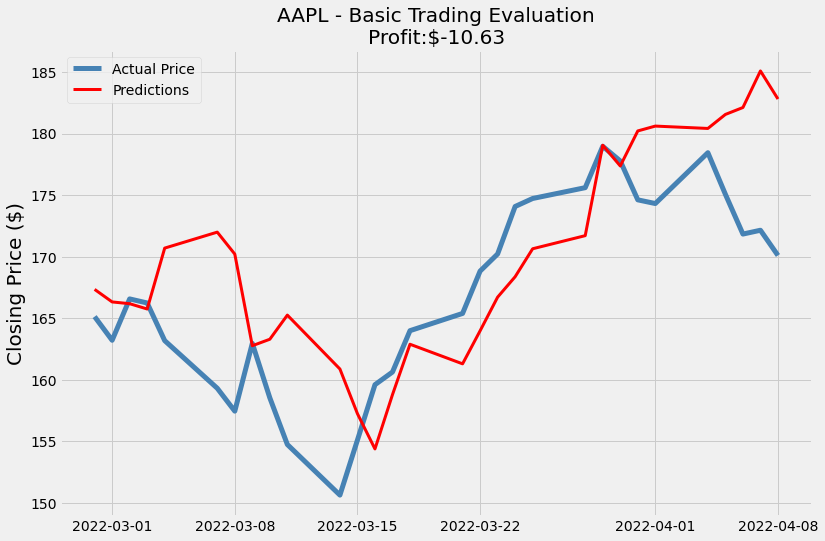

In [81]:
plt.figure(figsize=(12, 8))
plot_x = model_runs[0].results['ensemble']['predict_date']
plot_y = model_runs[0].results['ensemble']['actual']
plt.plot(plot_x,plot_y,color='steelblue',linewidth=5, label="Actual Price")
plot_y = edf.transpose().mean().values
plt.plot(plot_x,plot_y,color='red',linewidth=3, label="Predictions")
plt.ylabel("Closing Price ($)",fontsize=20)
plt.title(f"AAPL - Basic Trading Evaluation\nProfit:${mean_traditional_pl}")
plt.legend()
plt.show()